# Linear Regression Practice Notebook

<img src="images/ethnicity.jpg"/>

In [1]:
# Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the 2015-2016 wave of NHANES data
da = pd.read_csv("data/nhanes_2015_2016.csv")

In [3]:
# Drop unused columns, and drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI",
        "SMQ020"]

da = da[vars].dropna()

In [4]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


## Question 1:

**Use linear regression to relate the expected body mass index (BMI) to a person's age.**

In [5]:
# OLS Model of BPXSY1 with RIDAGEYR

model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Thu, 25 Mar 2021   Prob (F-statistic):             0.0991
Time:                        11:59:59   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Funded Amount x Lender Count')

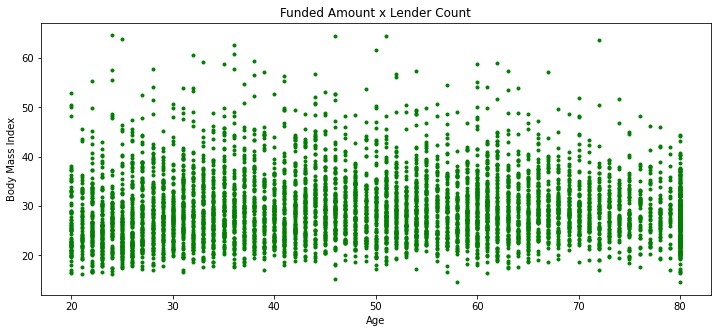

In [6]:
# Scatter Plot

plt.figure(figsize=(12,5))

plt.scatter(da['RIDAGEYR'],da['BMXBMI'],c='g',marker='.') # plt.scatter(x,y)

plt.xlabel('Age')
plt.ylabel('Body Mass Index')
plt.title('Funded Amount x Lender Count')

**Q1a.** According to your fitted model, do older people tend to have higher or lower BMI than younger people?

**Answer.** Yes, but the correlation is very low.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

**Answer.** No. p-value for the BMI coefficient is **0.099**, this means that the p-value for 2 side test (ro=zero) is 0.099/2. As **0.0495** (p-value) ~ **0.05** (alpha, for 95% confidence interval), this variable is maginally significant (p-value > alpha, means "NO linear relationship").

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [7]:
b0 = 29.0564
b1 = 0.0091

x11 = 40
y1 = b0 + b1*x11

x12 = 20
y2 = b0 + b1*x12

print(f'Answer: {round(y1-y2,2)}')

Answer: 0.18


__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

**Answer.** Only 0.1% (r^2 = 0.001).

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [8]:
da['RIDRETH1'].unique()

array([3, 4, 1, 5, 2], dtype=int64)

In [9]:
# Create a labeled version of the ethnic variable

da['RIDRETH1x'] = da.RIDRETH1.replace({1: "Mexican American", 
                                       2: "Other Hispanic", 
                                       3: "Non-Hispanic White", 
                                       4: "Non-Hispanic Black", 
                                       5: "Other Race"}) 

# Create a labeled version of the gender variable

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [10]:
# OLS Model of BPXSY1 with RIDAGEYR

model2 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", 
                             data=da)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.98e-59
Time:                        12:00:00   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          31.2361      0.355     87.891      0.000      30.539      31.933
RIDRETH1x[T.Non-Hispanic Black]    -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]    -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]        -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race]            -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIAGENDRx[T.Male]                  -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDAGEYR                            0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

**Answer.** Change: 

    Before, for each 1 year variation we had 0.0091 BMI variation. 
    Now, for each 1 year variation we had 0.0065 BMI variation.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

**Answer.** Change from **0.006** to **0.005**. 

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

**Answer.** With 'Gender', 'Ethinicity' and 'Age', the model can explain **5.5%** of variation in BMI. Before (only 'Age'), the fraction of variation of BMI in this population is explained by age was **0.1%**.

__Q2d.__ What reference level did the software select for the ethnicity variable?

**Answer.** Mexican American.

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

In [31]:
b0 = 31.2361     # intercept
b1 = 0.0065      # age
b2 = -0.4499     # non-Hispanic black
b3 = -1.0226     # gender

x11 = 40
x21 = 1
x31 = 1  # zero if female
y1 = b0 + b1*x11 + b2*x21 + b3*1

x12 = 30
x22 = 1
x31 = 1  # zero if female
y2 = b0 + b1*x12 + b2*x22 + b3*1

print(f'Answer: {round(y1-y2,2)}')

Answer: 0.07


__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American man and a 50 year-old non-Hispanic black man?

In [32]:
b0 = 31.2361     # intercept
b1 = 0.0065      # age

b2ma = 0           # mexican american
b2nb = -0.4499     # non-hispanic black

x11 = 50
x21 = 1
y1 = b0 + b1*x11 + b2ma*x21

x12 = 50
x22 = 1
y2 = b0 + b1*x12 + b2nb*x22

print(f'Answer: {round(y1-y2,2)}')

Answer: 0.45


## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [14]:
# Generating sample with random 25% of 'da'

da_sample = da.sample(frac =.25)

da_sample.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,RIDRETH1x,RIAGENDRx
5345,120.0,23,1,2,5.0,26.2,1,Other Hispanic,Male
2617,126.0,51,1,5,2.0,18.3,1,Other Race,Male
2889,114.0,23,2,4,2.0,26.8,2,Non-Hispanic Black,Female
1985,134.0,60,2,4,3.0,28.8,2,Non-Hispanic Black,Female
2480,126.0,25,1,4,2.0,20.4,1,Non-Hispanic Black,Male


In [15]:
da_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 5345 to 1355
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BPXSY1     1276 non-null   float64
 1   RIDAGEYR   1276 non-null   int64  
 2   RIAGENDR   1276 non-null   int64  
 3   RIDRETH1   1276 non-null   int64  
 4   DMDEDUC2   1276 non-null   float64
 5   BMXBMI     1276 non-null   float64
 6   SMQ020     1276 non-null   int64  
 7   RIDRETH1x  1276 non-null   object 
 8   RIAGENDRx  1276 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 99.7+ KB


In [16]:
# OLS Model of BPXSY1 with RIDAGEYR

model3 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", 
                             data=da_sample)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     14.49
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           4.76e-16
Time:                        12:33:44   Log-Likelihood:                -4279.0
No. Observations:                1276   AIC:                             8572.
Df Residuals:                    1269   BIC:                             8608.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          31.8084      0.729     43.643      0.000      30.379      33.238
RIDRETH1x[T.Non-Hispanic Black]    -0.4776      0.646     -0.739      0.460      -1.745       0.790
RIDRETH1x[T.Non-Hispanic White]    -1.8026      0.583     -3.093      0.002      -2.946      -0.659
RIDRETH1x[T.Other Hispanic]        -1.2534      0.734     -1.707      0.088      -2.694       0.187
RIDRETH1x[T.Other Race]            -5.4864      0.690     -7.955      0.000      -6.840      -4.133
RIAGENDRx[T.Male]                  -1.1007      0.390     -2.824      0.005      -1.865      -0.336
RIDAGEYR                           -0.0018      0.011     -0.164      0.870      -0.023       0.020
==============================================================================
Omnibus:                      241.453   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.994
Skew:                           1.093   Prob(JB):                    1.46e-107
Kurtosis:                       5.115   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

| Population | coef | std err |
| --- | --- | --- |
| Intercept | 31.2361 | 0.355 |
| RIDRETH1x[T.Non-Hispanic Black] | -0.4499 | 0.308 |
| RIDRETH1x[T.Non-Hispanic White] | -1.8555	| 0.282
| RIDRETH1x[T.Other Hispanic] | -0.9379 | 0.345 |
| RIDRETH1x[T.Other Race] | -4.7799 | 0.334 |
| RIAGENDRx[T.Male] | -1.0226 | 0.190 |
| RIDAGEYR | 0.0065 | 0.005 |

    
| Sample | coef | std err |
| --- | --- | --- |
| Intercept | 31.8084 | 0.729 |
| RIDRETH1x[T.Non-Hispanic Black] | -0.4776 | 0.646 |
| RIDRETH1x[T.Non-Hispanic White] | -1.8026	| 0.583
| RIDRETH1x[T.Other Hispanic] | -1.2534 | 0.734 |
| RIDRETH1x[T.Other Race] | -5.4864 | 0.690 |
| RIAGENDRx[T.Male] | -1.1007 | 0.390 |
| RIDAGEYR | -0.0018 | 0.011 |

In [30]:
   now = np.array([0.729, 0.646, 0.583, 0.734, 0.690, 0.390, 0.011])
before = np.array([0.355, 0.308, 0.282, 0.345, 0.334, 0.190, 0.005])

proportion = ((now / before) - 1)*100
prop_mean = proportion.mean()

print(round(prop_mean,2))

109.49


**Answer.** The errors increased by approximately 109%.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

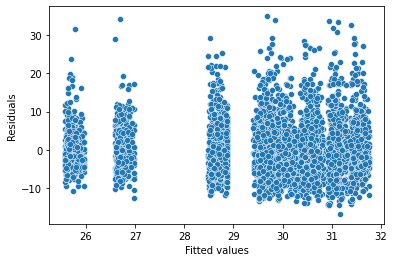

In [33]:
# Plot of residuals on fitted values

pp = sns.scatterplot(result2.fittedvalues, result2.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

**Answer.** It appears that we have a modestly increasing mean/variance relationship.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [34]:
da.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIDRETH1x', 'RIAGENDRx'],
      dtype='object')

In [35]:
da['RIDRETH1x'].unique()

array(['Non-Hispanic White', 'Non-Hispanic Black', 'Mexican American',
       'Other Race', 'Other Hispanic'], dtype=object)

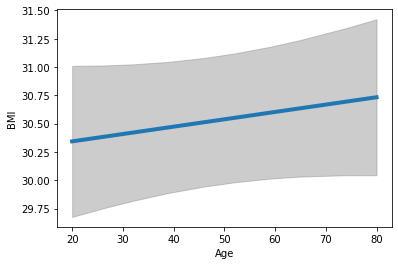

In [48]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDR": 1, "BMXBMI": 25, "DMDEDUC2": 1, 
          "RIDRETH1": 1, "SMQ020": 1, 'RIDRETH1x': 'Mexican American',
          "RIAGENDRx": 'Male'}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result2, "RIDAGEYR",
                                values=values, 
                                ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

**Answer.** BMI 30.5 (50 years, shortest interval). 

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

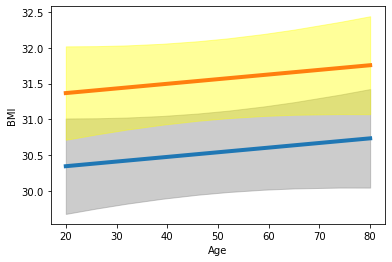

In [51]:
values1 = {"RIAGENDR": 1, "BMXBMI": 25, "DMDEDUC2": 1, 
           "RIDRETH1": 1, "SMQ020": 1, 'RIDRETH1x': 'Mexican American',
           "RIAGENDRx": 'Male'}

pr, cb, fv = predict_functional(result2, "RIDAGEYR",
                                values=values1, 
                                ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

values2 = {"RIAGENDR": 2, "BMXBMI": 25, "DMDEDUC2": 1, 
           "RIDRETH1": 1, "SMQ020": 1, 'RIDRETH1x': 'Mexican American',
           "RIAGENDRx": 'Female'}

pr2, cb2, fv2 = predict_functional(result2, "RIDAGEYR",
                                values=values2, 
                                ci_method="simultaneous")

bx = sns.lineplot(fv2, pr2, lw=4)
bx.fill_between(fv2, cb2[:, 0], cb2[:, 1], color='yellow', alpha=0.4)

**Answer.** Because Female BMI is respectively higher. 

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

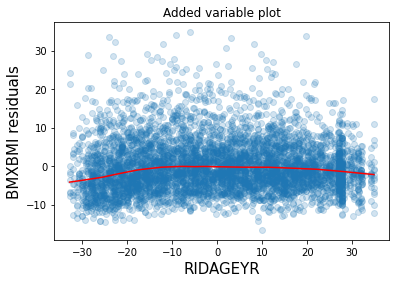

In [43]:
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model4 = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", 
                              data=da)
result4 = model4.fit()
result4.summary()

fig = result4.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

The plot "added variable plot" is a plot that may reveal nonlinearity in the relationship between one covariate and the outcome. Above, we create an added variable plot for age as a predictor of BMI. Note that the two variables being plotted (age and Body Mass Index) have been centered. The scale of the variables is unchanged, but the origin has been translated to zero. The red line is an estimte of the relationship between age and BMI. Unlike the relationship in the model, it is not forced to be linear, and there is in fact a hint that the shape is positive inclined for the first 15 years or so of age. This would imply that BMI increases until people in theie 20s and early 30s, then begins slowly decreases after that point.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [59]:
dc = pd.read_csv("data/nhanes_2015_2016.csv")

dc.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


In [60]:
dc['ALQ110'].unique()

array([nan,  1.,  2.,  9.,  7.])

In [61]:
dc = pd.read_csv("data/nhanes_2015_2016.csv")

# Drop unused columns, and drop rows with any missing values.
vars2 = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", 
         "SMQ020", "ALQ110"]

dc = dc[vars2].dropna()

dc.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,ALQ110
3,56,2,3,5.0,42.4,2,1.0
4,42,2,4,4.0,20.3,2,1.0
5,72,2,1,2.0,28.6,2,2.0
13,67,2,2,5.0,43.7,2,1.0
19,54,2,5,4.0,26.3,2,2.0


In [63]:
# ALQ110  = Had at least 12 alcohol drinks/lifetime?

dc['ALQ110'].unique()

array([1., 2., 9., 7.])

In [65]:
# Create a labeled version of the ALQ110 variable, where 7 and 9 as NA's.
dc["ALQ"] = dc.ALQ110.replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Create a labeled version of the gender variable
dc["RIAGENDRx"] = dc.RIAGENDR.replace({1: "Male", 2: "Female"})

In [68]:
# If an event has probability p, then the odds for this event is p/(1-p)

c = pd.crosstab(dc.RIAGENDRx, dc.ALQ).apply(lambda x: x/x.sum(), axis=1)

# Had at least 12 alcohol drinks/lifetime? 1 = 'Yes', 0 = 'No'

c["odds"] = c.loc[:, 1] / c.loc[:, 0]

c

ALQ,0.0,1.0,odds
RIAGENDRx,,,
Female,0.549232,0.450768,0.820724
Male,0.541203,0.458797,0.847737


In [69]:
# 'odds ratios', comparing two groups

OR = c.odds.Male / c.odds.Female

print(round(OR,2))

1.03


In [70]:
# It is conventional to work with odds on the logarithmic scale.

c["logodds"] = np.log(c.odds)
c

ALQ,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549232,0.450768,0.820724,-0.197569
Male,0.541203,0.458797,0.847737,-0.165185


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

**Answer.** The fact that the log odds for females is negative reflects that fact that less than 50% of females have a history of drinking. Because the log odds for females is closer to 0, consistent with around half of males having a history of drinking.

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

**Answer.** No. The odds are very close.